In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

# given file path
dir = './test_data/test_images_8_bit/'
img_name = 'image_2.jpeg'

In [94]:
from tensorflow.keras.models import load_model

# load model from the saved file
model = load_model('C:/Users/Owner/Documents/AutomotiveChallenge/Road/Competition_Files/thermal_detection_model.h5')
model.input_shape

(None, 150, 150, 1)

In [95]:
# get image
full_img = cv2.imread(os.path.join(dir,img_name), cv2.IMREAD_GRAYSCALE)
IMG_SHAPE = full_img.shape

# get x and y bounds
X_CUT = 2
Y_CUT = 5

x_bounds = []
y_bounds = []

for i in range(X_CUT):
    x_bounds.append((int(i*IMG_SHAPE[1]/X_CUT), int((i+1)*IMG_SHAPE[1]/X_CUT)))
for j in range(Y_CUT):
    y_bounds.append((int(j*IMG_SHAPE[0]/Y_CUT), int((j+1)*IMG_SHAPE[0]/Y_CUT)))

x_bounds, y_bounds

([(0, 320), (320, 640)],
 [(0, 102), (102, 204), (204, 307), (307, 409), (409, 512)])

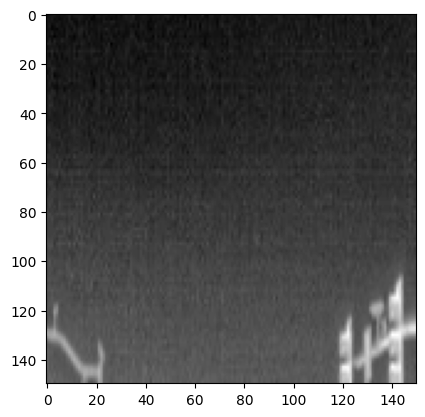

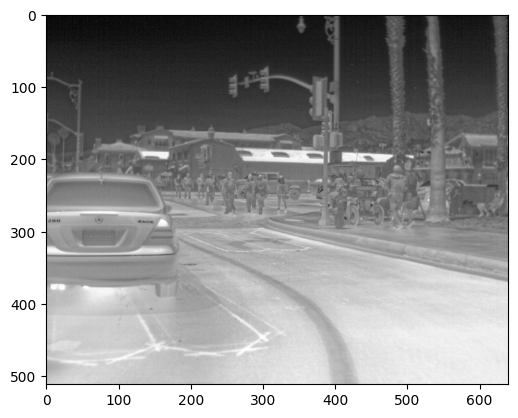

In [96]:
# cut image into quadrants
img_array = []
IMG_SIZE = model.input_shape[1]

for i in range(X_CUT):
    x_bb = x_bounds[i]
    for j in range(Y_CUT):
        y_bb = y_bounds[j]

        # split image and save into img_array
        cropped_img = full_img[y_bb[0]:y_bb[1], x_bb[0]:x_bb[1]]

        cropped_img_2 = cv2.resize(cropped_img, (IMG_SIZE, IMG_SIZE))
        
        img_array.append(cropped_img_2)

# show
plt.imshow(img_array[0], cmap="gray")
plt.show()
plt.imshow(full_img, cmap="gray")
plt.show()

In [97]:
# make testing set

X_test = np.array(img_array)
X_test = X_test.reshape(-1, X_test.shape[1], X_test.shape[2], 1)
X_test = X_test.astype('float32') / 255.0

In [98]:
X_test.shape

(10, 150, 150, 1)

In [99]:
model.input_shape

(None, 150, 150, 1)

In [100]:
# Now you can use the model for predictions or evaluation
y_pred = model.predict(X_test)
y_pred



1/1 [==============================] - 0s 82ms/step


array([[1.0000000e+00, 4.3660561e-18, 1.6495315e-24],
       [1.0000000e+00, 1.5616259e-09, 6.2895070e-22],
       [1.0000000e+00, 4.1050243e-09, 2.1174312e-12],
       [9.8778397e-01, 1.2124109e-02, 9.1948124e-05],
       [9.5614141e-01, 3.2299715e-05, 4.3826398e-02],
       [1.0000000e+00, 1.9906690e-19, 4.3693741e-17],
       [9.9994373e-01, 5.6292174e-05, 2.7541245e-17],
       [2.1690113e-04, 3.6018008e-22, 9.9978310e-01],
       [9.9993277e-01, 6.7219109e-05, 2.6043251e-08],
       [8.5017836e-01, 6.2042579e-02, 8.7779023e-02]], dtype=float32)

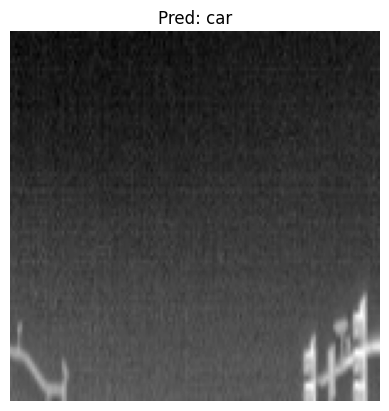

[1.0000000e+00 4.3660561e-18 1.6495315e-24]


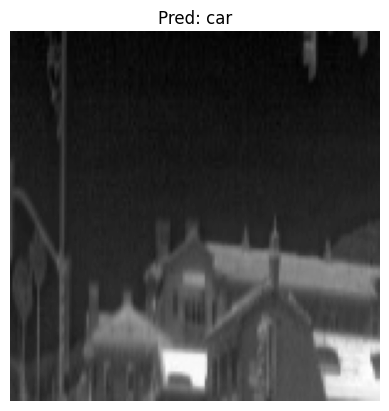

[1.0000000e+00 1.5616259e-09 6.2895070e-22]


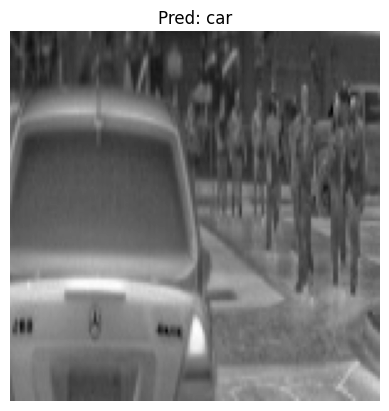

[1.0000000e+00 4.1050243e-09 2.1174312e-12]


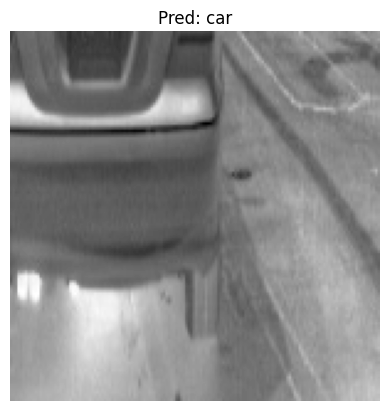

[9.8778397e-01 1.2124109e-02 9.1948124e-05]


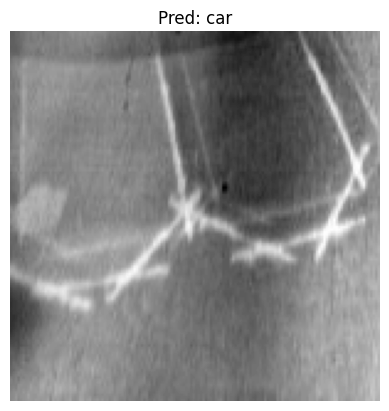

[9.5614141e-01 3.2299715e-05 4.3826398e-02]


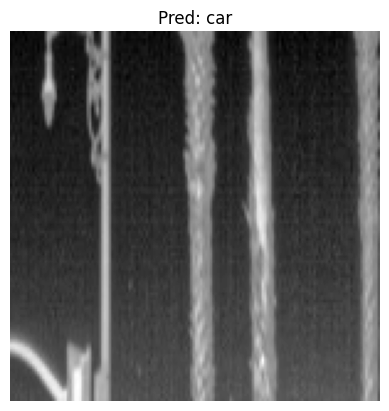

[1.000000e+00 1.990669e-19 4.369374e-17]


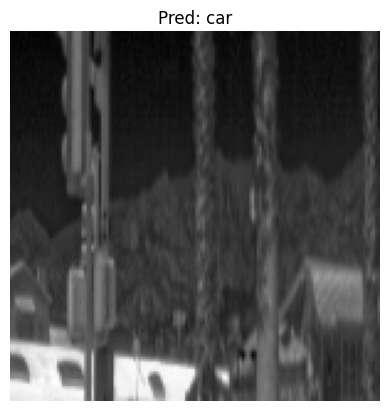

[9.9994373e-01 5.6292174e-05 2.7541245e-17]


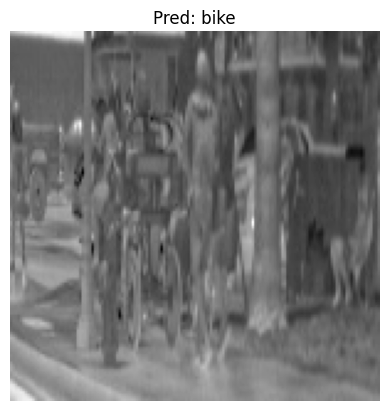

[2.1690113e-04 3.6018008e-22 9.9978310e-01]


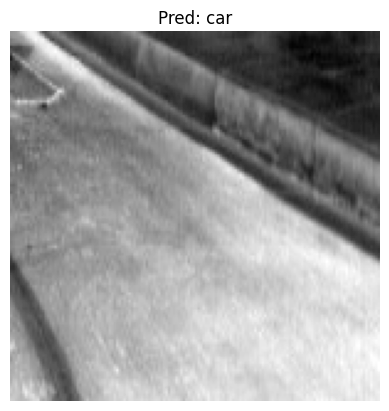

[9.9993277e-01 6.7219109e-05 2.6043251e-08]


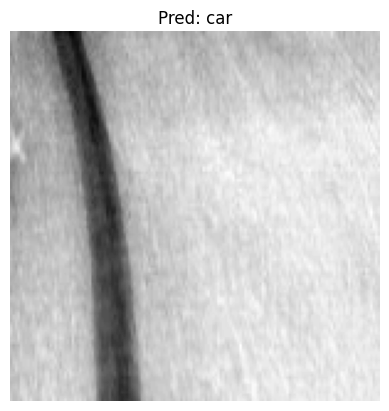

[0.85017836 0.06204258 0.08777902]


In [101]:
CATEGORIES = ["car", "person", "bike"]  # Object categories

for i in range(len(y_pred)):
    # Get the image, predicted label, and true label
    image = X_test[i].reshape(IMG_SIZE, IMG_SIZE)  # Reshape if needed (depends on your input shape)
    predicted_label = np.argmax(y_pred[i])  # Get the predicted class index
    # true_label = y_test[i]  # True label
    
    # Display the image
    plt.imshow(image, cmap='gray')  # Use 'gray' for grayscale images
    plt.title(f"Pred: {CATEGORIES[predicted_label]}") #, True: {CATEGORIES[true_label]}")
    plt.axis('off')  # Hide axes
    plt.show()
    print(y_pred[i])